In [2]:
library(lisi)
library(Seurat)
library(harmony)
library(magrittr)
library(gridExtra)
library(ggthemes)
library(scales)
library(pheatmap)
library(dplyr)
library(monocle)
library(reticulate)
library(ggbeeswarm)
library(ggrepel)
library(plyr)
library(ggplot2)
library(gridExtra)
library(ggthemes)
library(scales)
library(pheatmap)
library(dplyr)
library(RColorBrewer)
library(ggbeeswarm)
library(ggrepel)
library(patchwork)
library(MASS)
library(matrixStats)
library(viridis)
library(pbapply)
library(parallel)
library(grid)
library(ggridges)
library(ggpubr)

# LISI: (Local inverse Simpson’s index): measures degree of batch mixing in a low-dimensional embedding
#### "Instead of a fixed number of nearest neighbors as in the case of kBET, LISI selects the nearest neighbors based on the local distribution of distances with a fixed perplexity"
#### "The selected neighbors are then used to compute the inverse Simpson’s index for diversity, which is the effective number of types present in this neighborhood"

## After harmony correction

In [4]:
meta_all <- readRDS("/data/srlab1/fzhang/results//2020_05_14_COVID19_RA_SLE_UC_Crohn_MS_lung/meta_all_COVID19_RA_Rahul_SLE_UC_Crohn_MS_lung_pca_umap_harmony_umap_cluster_new_new_new_2020-05-26.rds")
meta_all$cell <- as.character(meta_all$cell)
rownames(meta_all) <- meta_all$cell  
meta_all[1:4, c("sample", "broad_cell_type_nk_dc", "tissue", "technology")]

sample,broad_cell_type_nk_dc,tissue,technology
<chr>,<chr>,<chr>,<chr>
301-0159,T cells,Synovium,CEL-Seq2
301-0159,T cells,Synovium,CEL-Seq2
301-0159,T cells,Synovium,CEL-Seq2
301-0159,T cells,Synovium,CEL-Seq2


In [6]:
lisi_res <- rbind(
    lisi::compute_lisi(meta_all[,c(21:40)], meta_all, c("sample", "broad_cell_type_nk_dc", "tissue", "technology"))
) %>% 
    tidyr::gather(key, val, sample, broad_cell_type_nk_dc, tissue, technology)

lisi_res[1:4,]

saveRDS(lisi_res, "LISI_after_harmony_2020-05-30.rds")

,key,val
,<chr>,<dbl>
1,sample,10.326378
2,sample,6.698756
3,sample,8.725586
4,sample,8.660591


In [3]:
lisi_res_before <- readRDS("/data/srlab1/fzhang/results/2020_05_14_COVID19_RA_SLE_UC_Crohn_MS_lung/LISI_before_harmony_2020-05-30.rds")
lisi_res_after <- readRDS("/data/srlab1/fzhang/results/2020_05_14_COVID19_RA_SLE_UC_Crohn_MS_lung/LISI_after_harmony_2020-05-30.rds")

In [4]:
plot_all <- rbind(lisi_res_before, lisi_res_after)
plot_all$type <- c(rep("before", nrow(lisi_res_before)), rep("after", nrow(lisi_res_after)))

Picking joint bandwidth of 0.17
Picking joint bandwidth of 0.0261
Picking joint bandwidth of 0.00481
Warning message:
"Removed 6718 rows containing non-finite values (stat_density_ridges)."Picking joint bandwidth of 0.000138
Warning message:
"Removed 8810 rows containing non-finite values (stat_density_ridges)."

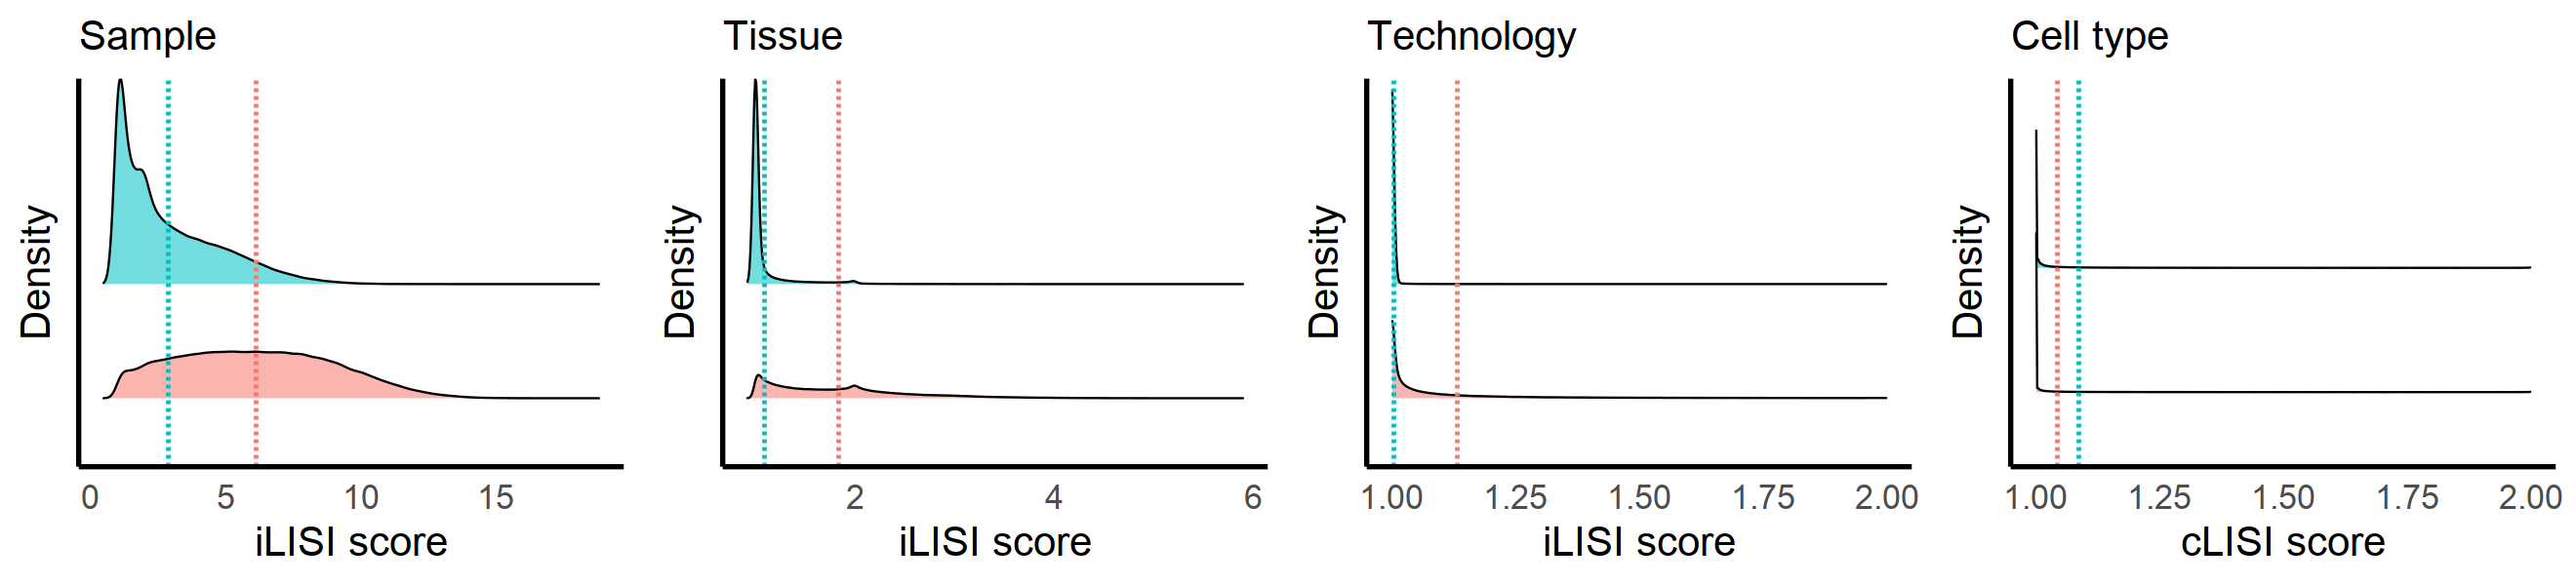

In [5]:
cdat <- ddply(plot_all[which(plot_all$key == "sample"),], "type", summarise, val=mean(val))
p1 <- ggplot(plot_all[which(plot_all$key == "sample"),],
       aes(x = val, y = type)) +
  geom_density_ridges(aes(fill = type, alpha = 0.5)) +
  geom_vline(data=cdat, aes(xintercept=val,  colour=type), linetype="dashed", size=1) +
  labs(
      x = "iLISI score",
      y = "Density",
      title = paste0("Sample", sep="")
      ) +
  theme_classic(base_size = 25) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=25)
  )


cdat <- ddply(plot_all[which(plot_all$key == "tissue"),], "type", summarise, val=mean(val))
p2 <- ggplot(plot_all[which(plot_all$key == "tissue"),],
       aes(x = val, y = type)) +
  geom_density_ridges(aes(fill = type, alpha = 0.5)) +
  geom_vline(data=cdat, aes(xintercept=val,  colour=type), linetype="dashed", size=1) +
  labs(
      x = "iLISI score",
      y = "Density",
      title = paste0("Tissue", sep="")
      ) +
  theme_classic(base_size = 25) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=25)
  )



cdat <- ddply(plot_all[which(plot_all$key == "technology"),], "type", summarise, val=mean(val))
p3 <- ggplot(plot_all[which(plot_all$key == "technology"),],
       aes(x = val, y = type)) +
  geom_density_ridges(aes(fill = type, alpha = 0.5)) +
  geom_vline(data=cdat, aes(xintercept=val,  colour=type), linetype="dashed", size=1) +
  xlim(1, 2) +
  labs(
      x = "iLISI score",
      y = "Density",
      title = paste0("Technology", sep="")
      ) +
  theme_classic(base_size = 25) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=25)
  )



cdat <- ddply(plot_all[which(plot_all$key == "broad_cell_type_nk_dc"),], "type", summarise, val=mean(val))
p4 <- ggplot(plot_all[which(plot_all$key == "broad_cell_type_nk_dc"),],
       aes(x = val, y = type)) +
  geom_density_ridges(aes(fill = type, alpha = 0.5)) +
  geom_vline(data=cdat, aes(xintercept=val,  colour=type), linetype="dashed", size=1) +
  xlim(1, 2) +
  labs(
      x = "cLISI score",
      y = "Density",
      title = paste0("Cell type", sep="")
      ) +
  theme_classic(base_size = 25) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=25)
  )


options(repr.plot.height = 5, repr.plot.width = 22)
all <- ggarrange(p1, p2, p3, p4, ncol = 4)
all
# ggsave("LISI_before_after_all_celltypes.pdf", all, width = 20, height = 3)